# 31회 ADP 복원

## 문제풀이 복원자 31회 시험 성적
- 머신러닝: 56점
- 통계분석: 30.5점
- 총합: 86.5점

# 기계학습 (60점)

## 데이터 설명
- 데이터 출처 : https://www.kaggle.com/datasets/mandysia/obesity-dataset-cleaned-and-data-sinthetic 후처리
- 데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_1_obesity_v2.csv
- 데이터 설명 : 각 환자의 의료정보이다. NObeyesdad를 종속변수로 하는 분류모델을 만드려고 한다.


    id: unique id for each row    
    Gender: sex - male or female    
    Age: age    
    Height: height    
    Weight: weight    
    family_history_with_overweight: Has a family member suffered or suffers f from overweight? - yes or no    
    FAVC: Frequent consumption of high caloric food - yes or no     
    FCVC: Frequency of consumption of vegetables - Never, Sometimes, Always    
    NCP: Number of main meals - 1, 2, 3, 4     
    CAEC: Consumption of food between meals - No, Sometimes, Frequently, Always    
    SMOKE: Do you smoke - yes o no    
    CH2O: Consumption of water daily - Less than a litter, between 1 and 2 l, more than 2 l    
    SCC: Calories consumption monitoring - yes or no   
    FAF: Physical activity frequency - 0, 1 to 2, 2 to 4, 4 to 5     
    TUE: Time using technology devices - 0 to 2, 3 to 5, >5    
    CALC: Consumption of alcohol - no, sometimes, frequently, always    
    MTRANS: Transportation used - automobile, motorbike, bike, public_transportation, walking    
    BMI: Body mass index
    
    (종속변수)     
    NObeyesdad: Type of obesity - overweight-level_i, obesity_type_i, obesity_type_ii, obesity_type_iii

## 1-1  EDA & 결측치 및 이상치를 판단하고 설명하라

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_1_obesity_v2.csv', encoding = 'cp949')
df.head()

,Unnamed: 0,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,0,4,male,27,1.80,87,no,no,always,3,sometimes,no,between 1 and 2 l,no,2 to 4,0 to 2,frequently,walking,overweight_level_i,26.851852
1,1,11,male,26,1.85,105,yes,yes,always,3,frequently,no,more than 2 l,no,2 to 4,>5,sometimes,public_transportation,obesity_type_i,30.679328
2,2,14,male,41,1.80,99,no,yes,sometimes,3,sometimes,no,between 1 and 2 l,no,2 to 4,3 to 5,frequently,automobile,obesity_type_i,30.555556
3,3,18,female,29,1.53,78,no,yes,sometimes,1,sometimes,no,between 1 and 2 l,no,0,0 to 2,no,automobile,obesity_type_i,33.320518
4,4,20,female,23,1.65,70,yes,no,sometimes,1,sometimes,no,between 1 and 2 l,no,0,0 to 2,sometimes,public_transportation,overweight_level_i,25.711662



주어진 데이터의 각 특성
데이터의 유형을 알아보면 범주형 데이터와 수치형 데이터로 이루어졌음을 알 수 있다.
특히 age, deck 변수는 결측값이 존재하는 것을 알 수 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1262 entries, 0 to 1261
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      1262 non-null   int64  
 1   id                              1262 non-null   object 
 2   Gender                          1262 non-null   object 
 3   Age                             1262 non-null   int64  
 4   Height                          1262 non-null   float64
 5   Weight                          1262 non-null   int64  
 6   family_history_with_overweight  1262 non-null   object 
 7   FAVC                            1262 non-null   object 
 8   FCVC                            1262 non-null   object 
 9   NCP                             1262 non-null   int64  
 10  CAEC                            1262 non-null   object 

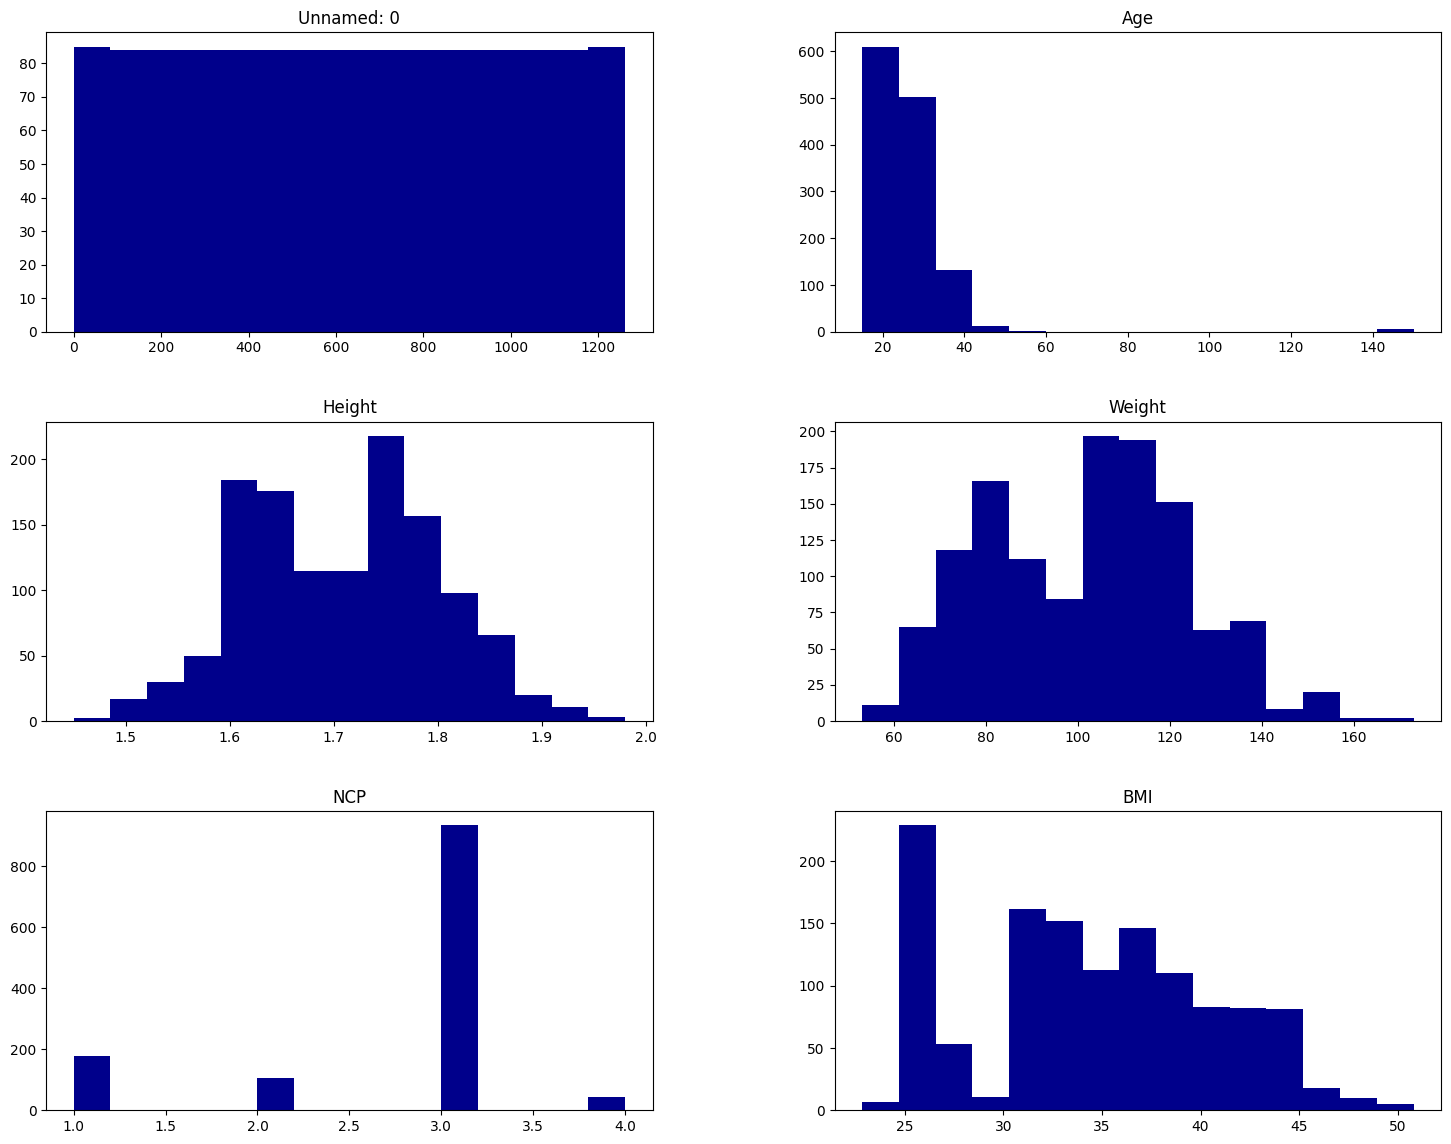

In [ ]:
# 1. 데이터의 항목별로 유형과 값 분포
print('''
주어진 데이터의 각 특성
데이터의 유형을 알아보면 범주형 데이터와 수치형 데이터로 이루어졌음을 알 수 있다.
특히 age, deck 변수는 결측값이 존재하는 것을 알 수 있다.
''')
df.info()

print('''
주어진 데이터와 수치형 데이터의 항목별 값 분포를 알아보았고 수치형 변수의 n-percentile값과 최대,
최소값 등을 알 수 있었으며, 아래와 같이 전체적인 분포를 확인할 수 있었다.
''')
print(df.describe())
import matplotlib.pyplot as plt
numeric_col = df.select_dtypes(exclude='object')
print('수치형 변수 분포 시각화')
df.hist(bins = 15, color = 'darkblue', figsize = (18,14), grid = False)
plt.show()



결측치 및 이상치의 확인


결측치 Unnamed: 0                        0
id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               3
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
BMI                               0
dtype: int64


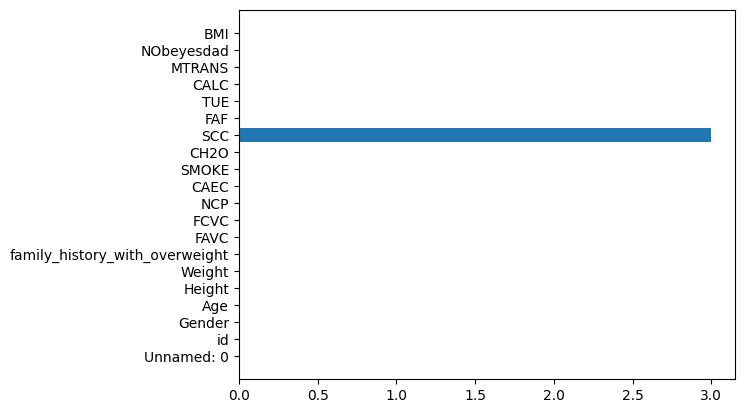

scc 데이터에 결측치가 있음을 확인할 수 있다.


In [ ]:
print('\n결측치 및 이상치의 확인\n')
print('\n결측치', df.isnull().sum())
missing_data = df.isnull().sum()
plt.barh(missing_data.index, missing_data.values)
plt.show()

print('scc 데이터에 결측치가 있음을 확인할 수 있다.')


이상치의 확인

이상치의 유무를 확인하기 위해 수치형 변수의 시각화를 진행하였다.
시각화 결과, 이상치로 보이는 변수 age,Weight, NCP를 확인할 수 있다.


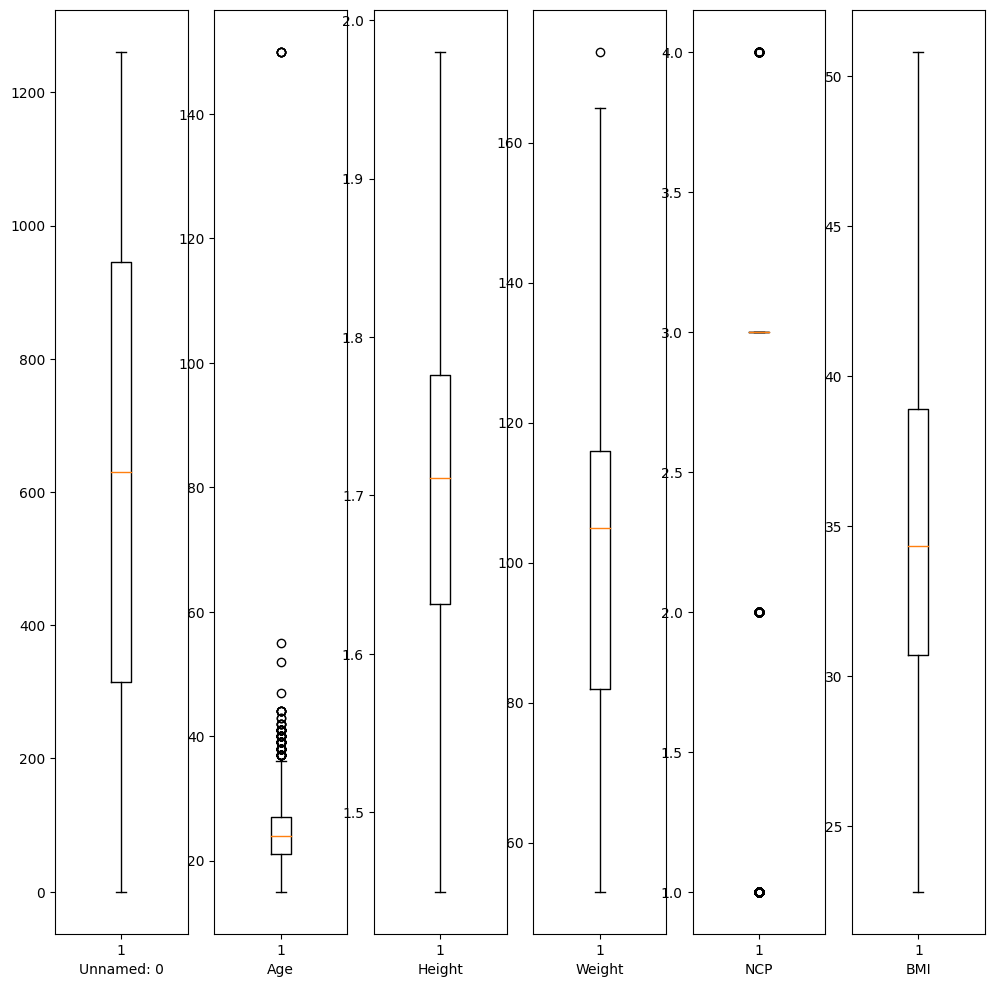

In [ ]:
print('이상치의 확인')
print('''
이상치의 유무를 확인하기 위해 수치형 변수의 시각화를 진행하였다.
시각화 결과, 이상치로 보이는 변수 age,Weight, NCP를 확인할 수 있다.''')

numeric = list(df.select_dtypes(exclude = ['object','category','bool']).columns)

fig,axes = plt.subplots(1,6,figsize=(12,12))
for ax, col in zip(axes.ravel(), df[numeric]):
  if col in numeric:
    ax.boxplot(df[col])
    ax.set_xlabel(col)

plt.show()

## 1-2 데이터 전처리 기법 2가지를 설명하고 주어진 데이터에 적용시 어떤 효과가 있는지 설명하라

In [ ]:
print('''
데이터 전처리 기법 2가지

1. 원핫 인코딩 : 여러값 중 하나만 활성화 하는 인코딩이다.
머신러닝 모델은 문자 데이터를 이해하지 못하기 때문에 문자로 구성된 범주형 데이터를 숫자로 바꿀 때 사용한다.
효과 : 현재 데이터는 object 타입의 범주형 데이터가 많으므로, 원핫 인코딩을 통해 머신러닝 모델에 넣을 수 있는 데이터 형태로 변환할 수 있게된다.

2. 정규화: 연속형 데이터를 특정 범위내로 스케일 조정하는 방법
주로 데이터의 범위를 0에서 1 사이로 제한할 때 사용하며 데이터의 상대적인 크기와 중요성을 유지할 수 있다.
효과 : 현재 데이터는 각 컬럼별 수치 범위가 다양하므로 정규화를 통해 데이터를 0과 1사이로 맞추는 정규화를 진행할 수 있다.
''')




데이터 전처리 기법 2가지

1. 원핫 인코딩 : 여러값 중 하나만 활성화 하는 인코딩이다.
머신러닝 모델은 문자 데이터를 이해하지 못하기 때문에 문자로 구성된 범주형 데이터를 숫자로 바꿀 때 사용한다.
효과 : 현재 데이터는 object 타입의 범주형 데이터가 많으므로, 원핫 인코딩을 통해 머신러닝 모델에 넣을 수 있는 데이터 형태로 변환할 수 있게된다.

2. 정규화: 연속형 데이터를 특정 범위내로 스케일 조정하는 방법
주로 데이터의 범위를 0에서 1 사이로 제한할 때 사용하며 데이터의 상대적인 크기와 중요성을 유지할 수 있다.
효과 : 현재 데이터는 각 컬럼별 수치 범위가 다양하므로 정규화를 통해 데이터를 0과 1사이로 맞추는 정규화를 진행할 수 있다.



In [ ]:
df.loc[df['NObeyesdad'] == 'overweight_level_i','target'] = 0
df.loc[df['NObeyesdad'] == 'obesity_type_i', 'target'] = 1
df.loc[df['NObeyesdad'] == 'obesity_type_ii', 'target'] = 2
df.loc[df['NObeyesdad'] == 'obesity_type_iii', 'target'] = 3
y = df['target']
df = df.drop(['NObeyesdad','target'], axis = 1)

print('결측 및 이상치 처리')
df['SCC'] = df['SCC'].fillna(df['SCC'].value_counts(ascending=False).index[0])
numeric = list(df.select_dtypes(exclude = ['object','category','bool']).columns)

for col in numeric:
  IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
  top = df[col].quantile(0.75) + IQR * 1.5
  down = df[col].quantile(0.25) - IQR * 1.5
  df[col] = df[col].clip(down, top)

결측 및 이상치 처리


In [ ]:
print('정규화 처리 및 원핫 인코딩 처리')
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[numeric] = scaler.fit_transform(df[numeric])

import pandas as pd
cat_df = list(df.select_dtypes(include = 'object').columns)
df = pd.get_dummies(df, columns = cat_df)
df

정규화 처리 및 원핫 인코딩 처리


,Unnamed: 0,Age,Height,Weight,NCP,BMI,"id_1,210","id_1,211","id_1,212","id_1,213",...,TUE_3 to 5,TUE_>5,CALC_frequently,CALC_no,CALC_sometimes,MTRANS_automobile,MTRANS_bike,MTRANS_motorbike,MTRANS_public_transportation,MTRANS_walking
0,0.000000,0.571429,0.660377,0.298246,0.0,0.143831,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0.000793,0.523810,0.754717,0.456140,0.0,0.280600,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,0.001586,1.000000,0.660377,0.403509,0.0,0.276177,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
3,0.002379,0.666667,0.150943,0.219298,0.0,0.374979,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,0.003172,0.380952,0.377358,0.149123,0.0,0.103088,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,0.996828,0.285714,0.491943,0.684211,0.0,0.788806,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1258,0.997621,0.333333,0.563366,0.710526,0.0,0.747371,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1259,0.998414,0.380952,0.570200,0.710526,0.0,0.740292,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1260,0.999207,0.428571,0.546132,0.701754,0.0,0.759149,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0


## 1-3 피쳐 엔지니어링을 통해 파생변수 1개를 생성하고 그 이유를 말하라

In [ ]:
#
import numpy as np
df['Age_BMI_ratio'] = df['Age']/df['BMI']
df['Age_BMI_ratio'] = df['Age_BMI_ratio'].replace([np.inf, -np.inf],1)
print('주어진 데이터를 토대로 age와 BMI 두개의 특성을 이용하여 Age_BMI_ratio 라는 새로운 특성을 추가하였다.')
print('''
이 새로운 특성은 age를 BMI로 나눈 비율을 나타낸다. 이를 추가한 이유는 BMI대비 나이가 높을수록 비만 정도가 높다는 가설을 확인하기 위함이다.
''')

주어진 데이터를 토대로 age와 BMI 두개의 특성을 이용하여 Age_BMI_ratio 라는 새로운 특성을 추가하였다.

이 새로운 특성은 age를 BMI로 나눈 비율을 나타낸다. 이를 추가한 이유는 BMI대비 나이가 높을수록 비만 정도가 높다는 가설을 확인하기 위함이다.



In [ ]:
df['Age_BMI_ratio']

0       3.972916
1       1.866749
2       3.620866
3       1.777880
4       3.695404
          ...   
1257    0.362211
1258    0.446008
1259    0.514598
1260    0.564542
1261    0.562614
Name: Age_BMI_ratio, Length: 1262, dtype: float64

## 2-1 앙상블을 제외한 분류 모델 3가지 구축 및 결과 비교 및 설명하라

In [ ]:
print('''
1. 결정트리 : 직관적인 해석이 가능하고 통계모델에 요구되는 가정에 자유롭다는 장점을 가지고 있음
2. 멀티 나이브 베이즈 분류 : 다양한 레벨의 분류가 가능하다는 장점을 가지고 있음
3. knn : 거리기반으로 다중 분류가 가능하다는 특징을 가지고 있다.
''')

print('결정트리')
X = df.drop(list(df.select_dtypes(include=['object','category','bool']).columns),axis = 1)
y = y.astype(int)

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)
model_dic = DecisionTreeClassifier()
model_dic.fit(X_train, y_train)
y_pred_decision = model_dic.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_decision)
print(f"결정트리 정확도 : {accuracy: .2f}")

from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train, y_train)
y_pred_decision = model_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_decision)
print(f"knn 정확도 : {accuracy: .2f}")

from sklearn.naive_bayes import GaussianNB
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)
y_pred_decision = model_gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_decision)
print(f"나이브베이즈 정확도 : {accuracy: .2f}")



1. 결정트리 : 직관적인 해석이 가능하고 통계모델에 요구되는 가정에 자유롭다는 장점을 가지고 있음
2. 멀티 나이브 베이즈 분류 : 다양한 레벨의 분류가 가능하다는 장점을 가지고 있음
3. knn : 거리기반으로 다중 분류가 가능하다는 특징을 가지고 있다.

결정트리
결정트리 정확도 :  0.99
knn 정확도 :  0.91
나이브베이즈 정확도 :  0.74


In [ ]:
print('결정트리가 가장 높은 정확도가 나왔고 2번째로는 knn, 나이브 베이즈는 정확도가 가장 낮은 모습을 보였다. ')

결정트리가 가장 높은 정확도가 나왔고 2번째로는 knn, 나이브 베이즈는 정확도가 가장 낮은 모습을 보였다. 


## 2-2 2-1에서 사용한 모델 중 하나를 골라 그리드 서치를 통해서 파라미터 튜닝 및 분류 모델 성능 평가 (precision ,recall)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth' : [None, 10, 20, 30],
              'min_samples_split' : [1,2,4]}
dic_grid_search = GridSearchCV(estimator= model_dic, param_grid = param_grid, cv = 5, scoring = 'accuracy')
dic_grid_search.fit(X,y)

print('결정트리 최적의 파라미터:', dic_grid_search.best_params_)
print('결정트리 최적의 스코어:', dic_grid_search.best_score_)
from sklearn.metrics import classification_report

pred = dic_grid_search.predict(X_test)
print(classification_report(y_test, pred))


결정트리 최적의 파라미터: {'max_depth': 10, 'min_samples_split': 2}
결정트리 최적의 스코어: 0.8899146746972834
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00        63
           2       1.00      1.00      1.00        58
           3       1.00      1.00      1.00        67

    accuracy                           1.00       253
   macro avg       1.00      1.00      1.00       253
weighted avg       1.00      1.00      1.00       253



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validat

## 2-3 2-1의 3가지 모델을 soft voting을 이용하여 모델링 한 결과와 2-2과 비교하라

In [ ]:
from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier(estimators = [('knn',model_knn),\
                                                ('gnb',model_gnb),\
                                                ('dic',model_dic)], voting = 'soft')

ensemble_model.fit(X_train, y_train)
y_pred = ensemble_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Ensemble Model Accuracy : ', accuracy)


Ensemble Model Accuracy :  0.9762845849802372


In [ ]:
print('성능 결과 비교 : (2-2) 모델들의 accuracy보다 평균적으로 더 높은 Accuracy가 산출됨을 확인할 수 있다.')

성능 결과 비교 : (2-2) 모델들의 accuracy보다 평균적으로 더 높은 Accuracy가 산출됨을 확인할 수 있다.


## 3-2 하나의 모델을 선정하여 Drop Column Importance 방식으로 각 변수 별로 전체 컬럼을 포함한 모델과의 recall 값의 차이를 계산하고 시각화 하라

In [ ]:
### 이 문제는 풀지 시험에서 못했습니다.
### 코드 참고만 해주세요

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

importance_scores={}

for feature in X_train.columns:
  X_modified = X_train.drop(feature, axis = 1)
  X_test_modified = X_test.drop(feature, axis = 1)
  model_modified = DecisionTreeClassifier()
  model_modified.fit(X_modified, y_train)

  y_pred_modified = model_modified.predict(X_test_modified)
  accuracy_modified =accuracy_score(y_test, y_pred_modified)

  importance_scores[feature] = accuracy - accuracy_modified

importance_scores = dict(sorted(importance_scores.items(), key=lambda item: item[1], reverse = True))

print('결정트리 특성 중요도 : ')
for feature, importance in importance_scores.items():
  print(f"{feature} : {importance}")


결정트리 특성 중요도 : 
Unnamed: 0 : 0.0
Age : 0.0
Height : 0.0
Weight : 0.0
NCP : 0.0
BMI : 0.0
id_1,210 : 0.0
id_1,211 : 0.0
id_1,212 : 0.0
id_1,213 : 0.0
id_1,214 : 0.0
id_1,215 : 0.0
id_1,216 : 0.0
id_1,217 : 0.0
id_1,218 : 0.0
id_1,219 : 0.0
id_1,220 : 0.0
id_1,221 : 0.0
id_1,222 : 0.0
id_1,223 : 0.0
id_1,224 : 0.0
id_1,225 : 0.0
id_1,226 : 0.0
id_1,227 : 0.0
id_1,228 : 0.0
id_1,229 : 0.0
id_1,230 : 0.0
id_1,231 : 0.0
id_1,232 : 0.0
id_1,233 : 0.0
id_1,234 : 0.0
id_1,235 : 0.0
id_1,236 : 0.0
id_1,237 : 0.0
id_1,238 : 0.0
id_1,239 : 0.0
id_1,240 : 0.0
id_1,241 : 0.0
id_1,242 : 0.0
id_1,243 : 0.0
id_1,244 : 0.0
id_1,245 : 0.0
id_1,246 : 0.0
id_1,247 : 0.0
id_1,248 : 0.0
id_1,249 : 0.0
id_1,250 : 0.0
id_1,251 : 0.0
id_1,252 : 0.0
id_1,253 : 0.0
id_1,254 : 0.0
id_1,255 : 0.0
id_1,256 : 0.0
id_1,257 : 0.0
id_1,258 : 0.0
id_1,259 : 0.0
id_1,260 : 0.0
id_1,261 : 0.0
id_1,262 : 0.0
id_1,263 : 0.0
id_1,264 : 0.0
id_1,265 : 0.0
id_1,266 : 0.0
id_1,267 : 0.0
id_1,268 : 0.0
id_1,269 : 0.0
id_1,270 : 0

<ipython-input-48-8d35a228dfaf>:16: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  plt.tight_layout()
<ipython-input-48-8d35a228dfaf>:16: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  plt.tight_layout()
<ipython-input-48-8d35a228dfaf>:16: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  plt.tight_layout()
<ipython-input-48-8d35a228dfaf>:16: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  plt.tight_layout()
<ipython-input-48-8d35a228dfaf>:16: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
<ipython-input-48-8d35a228dfaf>:16: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  plt.tight_layout()
<ipython-input-48-8d35a228dfaf>:16: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  plt.tight_layout()
<ipython-input-48-8d35a228dfaf>:16: UserWarning: Glyp

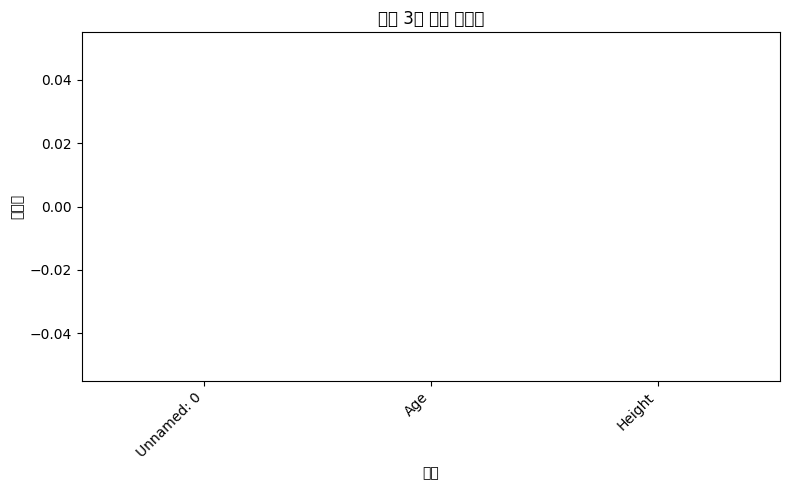

In [ ]:
import matplotlib.pyplot as plt

# importance_scores를 상위 3개로 제한
top_features = dict(list(importance_scores.items())[:3])

# 시각화
features = list(top_features.keys())
importances = list(top_features.values())

plt.figure(figsize=(8, 5))
plt.bar(features, importances, color='skyblue')
plt.xlabel('특성')
plt.ylabel('중요도')
plt.title('상위 3개 특성 중요도')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## 데이터 설명
- 데이터 출처 : 자체제작
- 데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_2_v2.csv
- 데이터 설명 : 중고등학생 건강검진 데이터

## 4-1 아래의 기준으로 전처리를 하여 적정 체중 여부 컬럼을 생성하고 BMI를 5단위로 구분하여 와 적정 체중여부에 대한 빈도 표를 만들어라

> bmi 계산
    - Bmi = 몸무게(kg)/(키(m)**2)   

> 만나이 구하기
    - 건강검진을 받았던 날을 기준으로 생년월일과 일수 차이가 16년 364일 이하인 경우 만 16세 그 이상의 경우 만 17로 분류하라
    - 윤년 등은 고려하지 않는다. 햇수로 16년 + 일수로 364일이 기준이다


> 적정 체중 여부 (BMI가 아래 구간에 들어올 경우)     
    17세 남자 : 21.03이상 23.21 미만   
    17세 여자 : 20.03이상 22.39 미만    
    16세 남자 : 21.18이상 23.45 미만   
    16세 여자 : 19.61이상 21.74 미만       

In [86]:
df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_2_v2.csv')
df['건강검진일'] =df['건강검진일'].str.replace('-','')
df['생년월일포맷변환'] = pd.to_datetime(df['생년월일'], format='%Y%m%d')
df['측정일자포맷변환'] = pd.to_datetime(df['건강검진일'], format='%Y%m%d')

df['만나이'] = (df['측정일자포맷변환']-df['생년월일포맷변환']).dt.days // 365
df

,ID,키,weight,생년월일,건강검진일,공학여부,채소섭취정도,아침식사여부,일주일운동시간,수면시간,성별,생년월일포맷변환,측정일자포맷변환,만나이
0,ID_4135,169.01,65.47,20041003,2020_11_15,1,2,1,4.4,8.3,남성,2004-10-03,2020-11-15,16
1,ID_3289,181.62,69.36,19970725,2014_11_20,0,3,0,4.4,6.9,남성,1997-07-25,2014-11-20,17
2,ID_1847,160.89,65.12,20020921,2020_01_28,1,1,1,1.7,9.6,여성,2002-09-21,2020-01-28,17
3,ID_4785,162.21,62.28,20020106,2018_09_27,1,4,0,5.1,6.8,남성,2002-01-06,2018-09-27,16
4,ID_5693,159.13,54.11,19980708,2015_03_03,0,4,1,0.3,8.5,여성,1998-07-08,2015-03-03,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6796,ID_6443,156.04,55.36,20030429,2020_04_23,1,4,1,7.8,9.3,여성,2003-04-29,2020-04-23,16
6797,ID_3606,182.46,67.55,20050528,2022_08_03,1,4,0,2.9,8.9,남성,2005-05-28,2022-08-03,17
6798,ID_5704,150.18,48.29,20030420,2020_02_29,0,1,1,6.0,7.8,여성,2003-04-20,2020-02-29,16
6799,ID_6637,159.45,60.53,20000718,2016_12_11,0,1,1,7.6,5.4,여성,2000-07-18,2016-12-11,16


In [87]:
df['BMI'] = df['weight']/((df['키']/100)**2)
df.head()

,ID,키,weight,생년월일,건강검진일,공학여부,채소섭취정도,아침식사여부,일주일운동시간,수면시간,성별,생년월일포맷변환,측정일자포맷변환,만나이,BMI
0,ID_4135,169.01,65.47,20041003,2020_11_15,1,2,1,4.4,8.3,남성,2004-10-03,2020-11-15,16,22.920154
1,ID_3289,181.62,69.36,19970725,2014_11_20,0,3,0,4.4,6.9,남성,1997-07-25,2014-11-20,17,21.027214
2,ID_1847,160.89,65.12,20020921,2020_01_28,1,1,1,1.7,9.6,여성,2002-09-21,2020-01-28,17,25.156852
3,ID_4785,162.21,62.28,20020106,2018_09_27,1,4,0,5.1,6.8,남성,2002-01-06,2018-09-27,16,23.669733
4,ID_5693,159.13,54.11,19980708,2015_03_03,0,4,1,0.3,8.5,여성,1998-07-08,2015-03-03,16,21.368469


In [88]:
df.loc[(df['성별'] == '남성') & (df['만나이'] == 16), '적절체중'] = df['BMI'].between(21.18, 23.4)
df.loc[(df['성별'] == '남성') & (df['만나이'] == 17), '적절체중'] = df['BMI'].between(21.03,23.21)
df.loc[(df['성별'] == '여성') & (df['만나이'] == 17), '적절체중'] = df['BMI'].between(20.03,22.39)
df.loc[(df['성별'] == '여성') & (df['만나이'] == 16), '적절체중'] = df['BMI'].between(19.61,21.74)

df['적절체중'] = df['적절체중'].apply(lambda x : '적절' if x else '부적절')

In [89]:
df['적절체중'].value_counts()

적절     3979
부적절    2822
Name: 적절체중, dtype: int64

## 4-2 4-1에서 구한 적정 체중 여부와 나머지 컬럼(공학여부, 아침식사여부, 일주일운동시간, 채소섭취정도, 수면시간, 성별) 이 독립적인지 통계적으로 확인하라

In [90]:
from scipy.stats import chi2_contingency

columns_to_test = ['공학여부', '아침식사여부','일주일운동시간', '채소섭취정도', '수면시간', '성별']
results = []
for column in columns_to_test:
  contingency_table = pd.crosstab(df['적절체중'], df[column])
  chi2, p, _, _ = chi2_contingency(contingency_table)
  results.append([chi2, p])

result_df = pd.DataFrame(results, columns = ['chi','p_value'], index=columns_to_test)
print(result_df)

                chi   p_value
공학여부       4.137843  0.041935
아침식사여부     0.408564  0.522699
일주일운동시간  117.082721  0.103660
채소섭취정도    10.593827  0.031529
수면시간      47.294653  0.542487
성별         0.086979  0.768053


## 4-3 4-2에서 유의한 변수들만 가지고 적정 체중 여부를 예측하는 모델을 구현하고 성능 평가 및 해석을 하라 (로지스틱회귀 ,xgb)
> 로지스틱회귀 모델은 오즈비를 구하라
> xgb의 경우 각 피쳐중요도를 확인하고 예측에 영향을 가장 미치는 변수를 확인하라

In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

df.loc[df['적절체중'] == '적절','적절체중'] = 1
df.loc[df['적절체중'] == '부적절','적절체중'] = 0
df
X = pd.get_dummies(df[['공학여부', '채소섭취정도']])
y = df['적절체중']
y = y.astype(int)
logistic_model = LogisticRegression()
logistic_model.fit(X,y)

xgboost_model = xgb.XGBClassifier()
xgboost_model.fit(X,y)

logistic_coefs = logistic_model.coef_[0]
xgboost_importance = xgboost_model.feature_importances_

logistic_coefs_df = pd.DataFrame({'로지스틱_모델의_중요한_변수' : logistic_coefs}, index = X.columns)
xgboost_importance_df = pd.DataFrame({'XGBoost_모델의_중요한_변수': xgboost_importance}, index = X.columns)

print(logistic_coefs_df.sort_values(by='로지스틱_모델의_중요한_변수', ascending = False).head(1))
print(xgboost_importance_df.sort_values(by='XGBoost_모델의_중요한_변수', ascending = False).head(1))

      로지스틱_모델의_중요한_변수
공학여부         0.101412
      XGBoost_모델의_중요한_변수
공학여부            0.702477


## 4-4 4-3 두 모델의 roc-auc 그래프를 하나의 그래프에 겹쳐 그려라

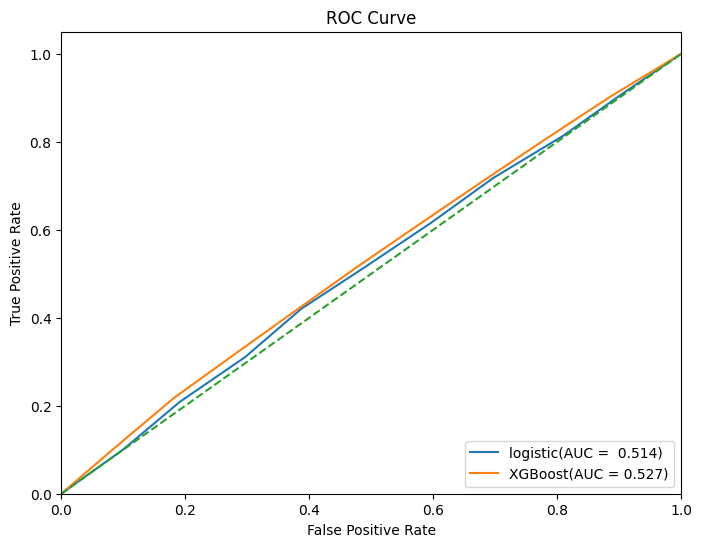

In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_logistic_prob = logistic_model.predict_proba(X)[:,1]
fpr_logistic, tpr_logistic, _ = roc_curve(y,y_logistic_prob)
roc_auc_logistic = roc_auc_score(y, y_logistic_prob)

y_xgboost_prob = xgboost_model.predict_proba(X)[:,1]
fpr_xgboost, tpr_xgboost, _  = roc_curve(y, y_xgboost_prob)
roc_auc_xgboost = roc_auc_score(y, y_xgboost_prob)

plt.figure(figsize = (8,6))
plt.plot(fpr_logistic, tpr_logistic , label = f'logistic(AUC = {roc_auc_logistic : .3f})')
plt.plot(fpr_xgboost, tpr_xgboost, label = f'XGBoost(AUC = {roc_auc_xgboost:.3f})')
plt.plot([0,1],[0,1], linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = 'lower right')
plt.show()


# 통계 (40점)

## 5. 평균이 $\theta$이고 분산이 100인 정규분포의 사전분포가 100, 256일때 120의 값을 가지는 데이터가 있을 경우 사후평균은? (5점)
무게가 N($\theta$, 100)인 정규분포에서, 사전분포는 N(100, 256)이다. 제품의 무게가 120kg일 때, 사후분포의 평균을 구하라

In [100]:
x = 120
b = 100/(100+256)
m=(1-b) * x + 100 * b
print(round(m,3))

114.382


## 데이터 설명
- 데이터 출처 : https://www.kaggle.com/datasets/yasserh/advertising-sales-dataset 후처리
- 데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_5_advertising.csv
- 데이터 설명 : TV, Radio, Newspaper에 각각 광고비(달러)를 다르게 했을때 매출액 (Sales , 밀리언달러)를 나타내는 데이터
- 종속변수 : Sales

In [117]:
import pandas as pd
df = pd.read_csv( 'https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_5_advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## 6-1 회귀 모델링 후 유의하지 않는변수 파악 (15점)

In [119]:
y = df['Sales']
X = df[['TV', 'Radio','Newspaper']]
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()

print(model.summary())
print('Newspaper 가 유의하지 않음')

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           8.13e-99
Time:                        15:55:54   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.0

## 6-2 변수 선택시 먼저 제거 될 변수 및 근거 제시

In [122]:
print('''pvalue의 값이 0.05 이하일 때 유의미한 변수로 진단할 수 있다.
현재 Newspaper를 제외한 나머지 변수들은 유의미한 것을 알 수 있고, 같은 이유로 Newspaper가 변수 선택시 먼저 제거되게 된다''')

pvalue의 값이 0.05 이하일 때 유의미한 변수로 진단할 수 있다.
현재 Newspaper를 제외한 나머지 변수들은 유의미한 것을 알 수 있고, 같은 이유로 Newspaper가 변수 선택시 먼저 제거되게 된다


## 6-3 VIF를 통한 다중공선성 진단

In [125]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['변수'] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


print(vif)

print('일반적으로 VIF값이 10이 넘어가면 다중공선성 문제가 있다고 판단할 수 있다. 결과적으로는 모든 변수가 다중공선성의 문제가 없음을 파악할 수 있다. ')

          변수       VIF
0      const  6.848900
1         TV  1.004611
2      Radio  1.144952
3  Newspaper  1.145187
일반적으로 VIF값이 10이 넘어가면 다중공선성 문제가 있다고 판단할 수 있다. 결과적으로는 모든 변수가 다중공선성의 문제가 없음을 파악할 수 있다. 


## 7 (15점)  
- 데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_7.csv
- 데이터 설명 : A,B,C,D,E 영업사원의 각 계약 성사 유무 (1:계약 , 0:미계약) 를 나타낸 데이터이다. 영업사원의 평균 계약 성사 건수는 같은지 통계 검정하라

In [116]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_7.csv')
df.head()
from statsmodels.stats.contingency_tables import cochrans_q

Q = cochrans_q(df[['A','B','C','D','E']])
print(Q.pvalue)
print('같음')

0.3406392758219471
같음


## 8 유기견이 하루에 2.2마리 발생한다 (10점)

## 8-1 한 마리도 안 버려질 확률

In [103]:
from scipy.stats import poisson

lmbda = 2.2

zero_proba = poisson.pmf(0,lmbda)
print(f'한마리도 안 버려질 확률 {zero_proba}')

한마리도 안 버려질 확률 0.11080315836233387


## 8-2 적어도 2마리 버려질 확률

In [102]:
from scipy.stats import poisson

lmbda = 2.2

probability_less_2 = poisson.cdf(1,lmbda)
probability_least = 1 - probability_less_2

print(f'적어도 2마리 버려져 있을 확률 : {probability_least}')

적어도 2마리 버려져 있을 확률 : 0.6454298932405317
